In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [149]:
def remove_outliers(group):
    """
    Remove outliers from a group of data based on Tukey's method.

    Parameters:
        group (pandas.DataFrame): A DataFrame representing a group of data.

    Returns:
        pandas.DataFrame: A DataFrame with outliers removed based on Tukey's method.

    Tukey's method identifies outliers as values that fall below Q1 - 1.5 * IQR or
    above Q3 + 1.5 * IQR, where Q1 is the first quartile, Q3 is the third quartile,
    and IQR is the interquartile range. This function calculates these values for
    the 'time' column within the input group DataFrame and removes any data points
    that are considered outliers.

    Example:
    >>> group = pd.DataFrame({'instance_size': ['A', 'A', 'B', 'B'],
    ...                      'time': [10, 15, 20, 30]})
    >>> cleaned_group = remove_outliers(group)
    >>> print(cleaned_group)
      instance_size  time
    0             A    10
    1             A    15

    """
    q1 = group['time'].quantile(0.25)
    q3 = group['time'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group['time'] >= lower_bound) & (group['time'] <= upper_bound)]


In [150]:
df = pd.read_csv('results.csv')
df["instance_size"] = df["file"].str.extract(r"knapPI_\d+_(\d+)_\d+_\d+")
df.describe()

,time,max_value
count,4200.000000,4200.000000
mean,25.107700,71345.833333
std,208.457895,127610.678528
min,0.000045,1487.000000
25%,0.000302,7098.000000
50%,0.015792,18044.500000
75%,1.796882,72505.000000
max,10125.479636,563647.000000


In [151]:
df["instance_size"] = df["instance_size"].astype(int)

df = df.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)
df.describe()

,time,max_value,instance_size
count,4189.000000,4189.000000,4189.000000
mean,18.337285,71132.238243,2673.191693
std,52.097135,127492.864734,3369.252488
min,0.000045,1487.000000,100.000000
25%,0.000302,7098.000000,200.000000
50%,0.005296,18038.000000,1000.000000
75%,1.795819,72505.000000,5000.000000
max,462.201318,563647.000000,10000.000000


In [152]:
for instance_size in df['instance_size'].unique():
    describe = df[(df['instance_size'] == instance_size) & (df['algorithm'] == 'dynamic')].describe()
    print(f"Instance size: {instance_size}")
    print(f"Mean: {describe['time']['mean']:.4f}")
    print(f"Standard deviation: {describe['time']['std']:.4f}\n")

Instance size: 100
Mean: 0.0310
Standard deviation: 0.0040

Instance size: 200
Mean: 0.0565
Standard deviation: 0.0041

Instance size: 500
Mean: 0.4253
Standard deviation: 0.0165

Instance size: 1000
Mean: 1.8149
Standard deviation: 0.0516

Instance size: 2000
Mean: 7.6140
Standard deviation: 0.2567

Instance size: 5000
Mean: 49.0721
Standard deviation: 2.8183

Instance size: 10000
Mean: 201.7446
Standard deviation: 16.0715



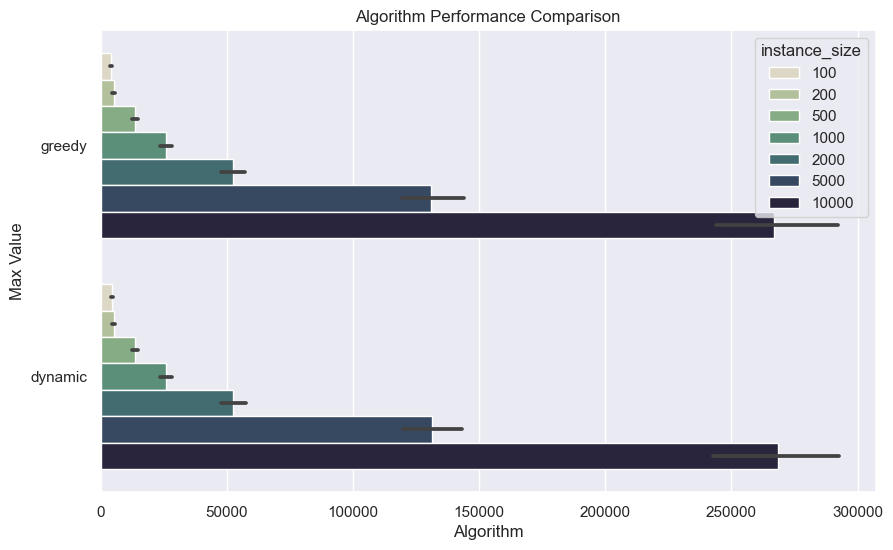

In [153]:
plt.figure(figsize=(10, 6))
# df.boxplot(column="max_value", by="algorithm")
df = df.sort_values(by=['max_value'])
sns.barplot(y="algorithm", x="max_value", data=df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Algorithm Performance Comparison")
plt.ylabel("Max Value")
plt.xlabel("Algorithm")
plt.show()

In [154]:
df[df['instance_size'] <= 1000]

,file,algorithm,time,max_value,instance_size
368,knapPI_2_100_1000_1,greedy,0.000047,1487.0,100
236,knapPI_2_100_1000_1,greedy,0.000046,1487.0,100
110,knapPI_2_100_1000_1,greedy,0.000049,1487.0,100
518,knapPI_2_100_1000_1,greedy,0.000045,1487.0,100
242,knapPI_2_100_1000_1,greedy,0.000049,1487.0,100
...,...,...,...,...,...
2143,knapPI_1_1000_1000_1,dynamic,1.916234,54503.0,1000
2017,knapPI_1_1000_1000_1,dynamic,1.782531,54503.0,1000
1843,knapPI_1_1000_1000_1,dynamic,1.826197,54503.0,1000
2077,knapPI_1_1000_1000_1,dynamic,1.784563,54503.0,1000


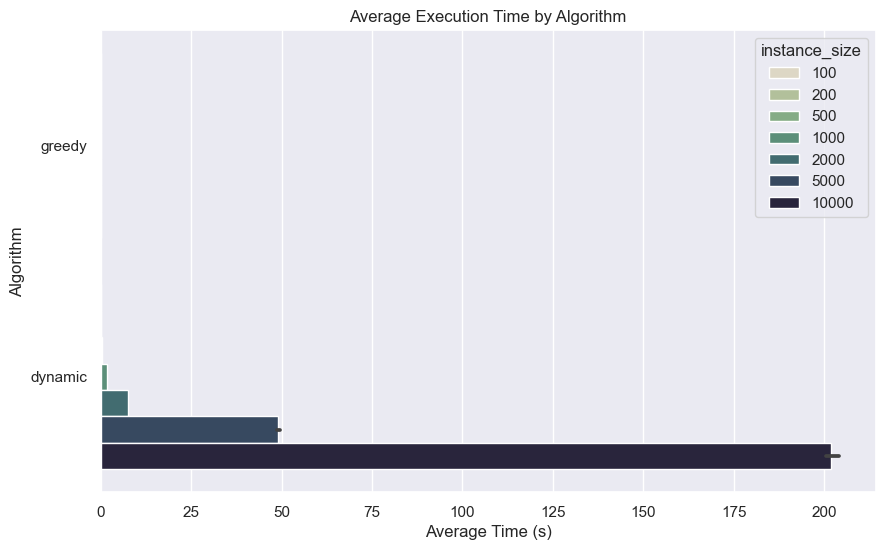

In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(y='algorithm', x="time", data=df, hue=df["instance_size"], \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

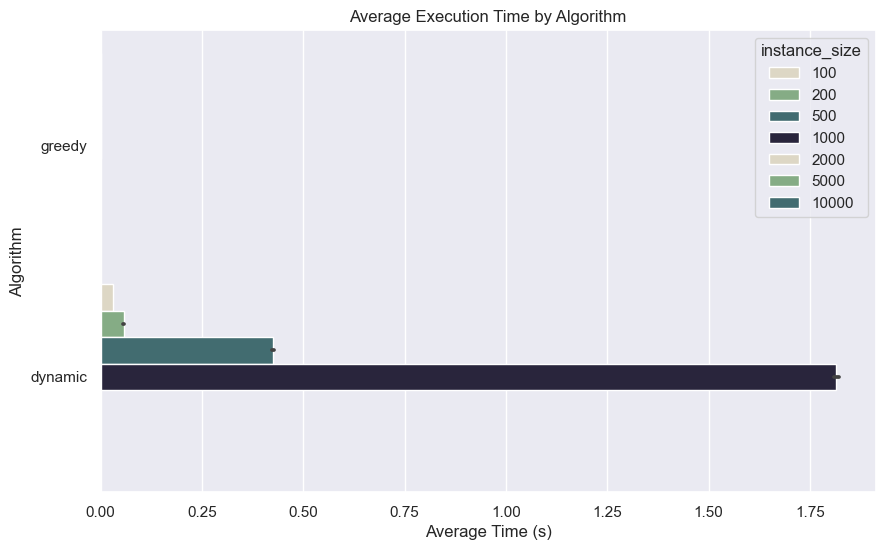

In [156]:
plt.figure(figsize=(10, 6))
sns.barplot(y='algorithm', x="time", data=df[df['instance_size'] <= 1000], hue=df["instance_size"], \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=4))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

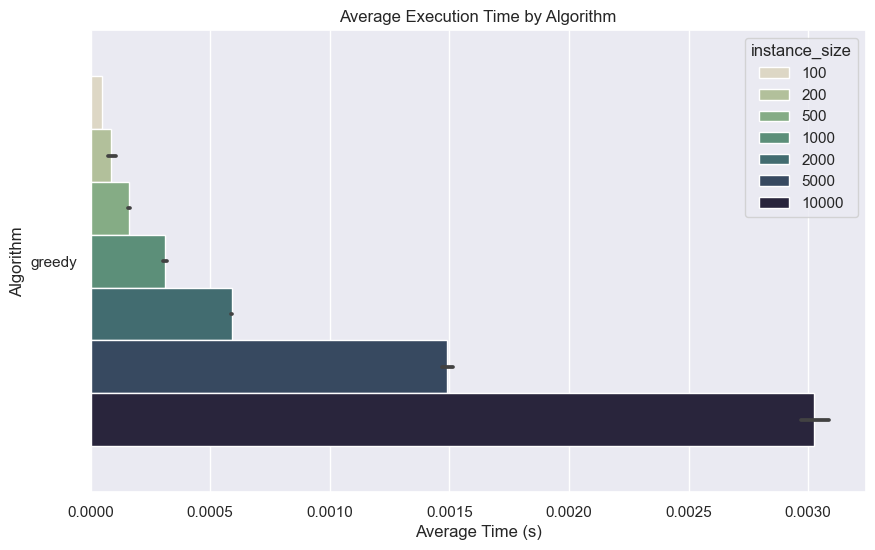

In [157]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'greedy')]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

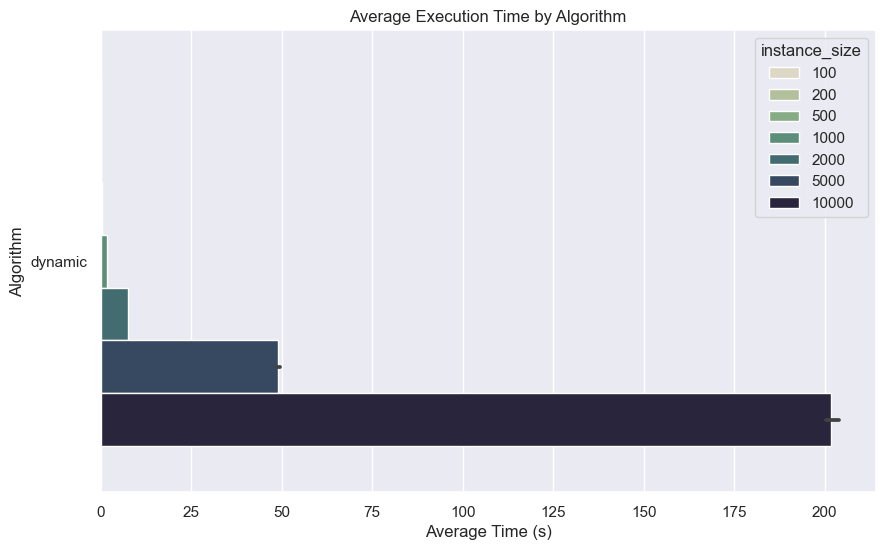

In [158]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'dynamic')]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

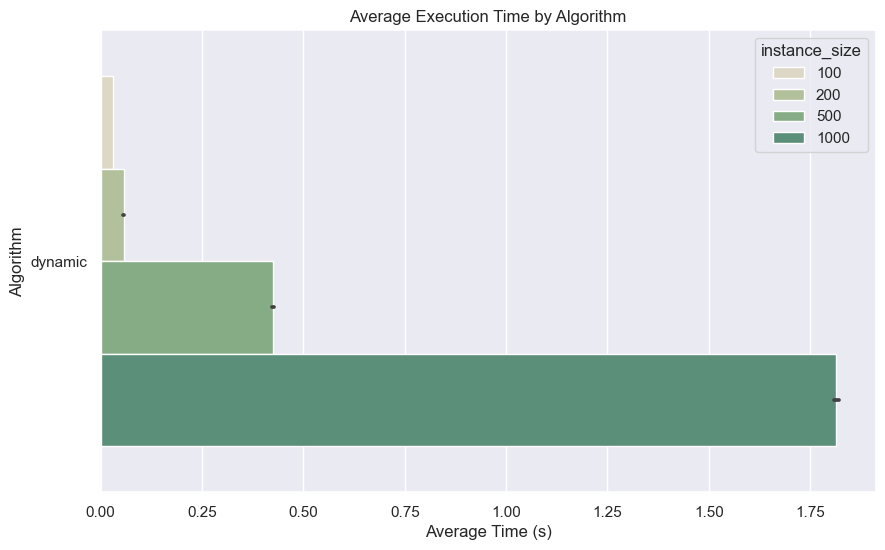

In [159]:
plt.figure(figsize=(10, 6))
filtered_df = df[(df['algorithm'] == 'dynamic') & (df['instance_size'] <= 1000)]
sns.barplot(y='algorithm', x="time", data=filtered_df, hue="instance_size", \
            palette=sns.color_palette("ch:start=.4,rot=-.8", n_colors=7))
plt.title("Average Execution Time by Algorithm")
plt.ylabel("Algorithm")
plt.xlabel("Average Time (s)")
plt.xticks(rotation=0)
plt.show()

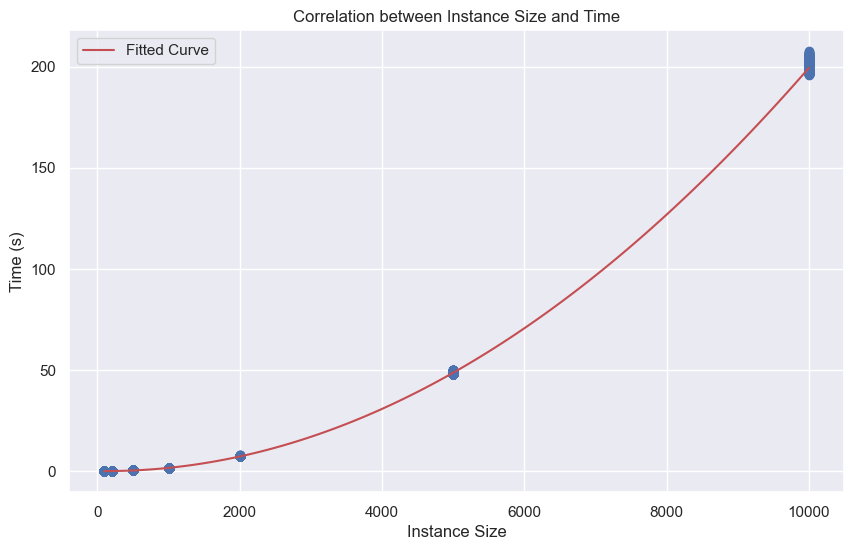

In [160]:
import numpy as np
from scipy.optimize import curve_fit

filtered_df = df[(df['algorithm'] == 'dynamic')]

filtered_df = filtered_df.groupby('instance_size').apply(remove_outliers).reset_index(drop=True)

def polynomial_func(x, a, b, c):
    return a * np.power(x, 2) + b * x + c

popt, _ = curve_fit(polynomial_func, filtered_df["instance_size"].astype(int), filtered_df["time"])

x_curve = np.linspace(filtered_df["instance_size"].astype(int).min(), filtered_df["instance_size"].astype(int).max(), 100)

y_curve = polynomial_func(x_curve, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df["instance_size"].astype(int), filtered_df["time"])
plt.plot(x_curve, y_curve, 'r', label="Fitted Curve")
plt.title("Correlation between Instance Size and Time")
plt.xlabel("Instance Size")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

In [161]:
df

,file,algorithm,time,max_value,instance_size
368,knapPI_2_100_1000_1,greedy,0.000047,1487.0,100
236,knapPI_2_100_1000_1,greedy,0.000046,1487.0,100
110,knapPI_2_100_1000_1,greedy,0.000049,1487.0,100
518,knapPI_2_100_1000_1,greedy,0.000045,1487.0,100
242,knapPI_2_100_1000_1,greedy,0.000049,1487.0,100
...,...,...,...,...,...
3848,knapPI_1_10000_1000_1,dynamic,198.717094,563647.0,10000
4088,knapPI_1_10000_1000_1,dynamic,198.833804,563647.0,10000
3992,knapPI_1_10000_1000_1,dynamic,208.194942,563647.0,10000
3638,knapPI_1_10000_1000_1,dynamic,198.847918,563647.0,10000
